In [142]:
import matplotlib.pyplot as plt
from matplotlib.dates import TU, WeekdayLocator
import mplcursors
import pandas as pd

## Create Dataframe 

To begin, we need a way to organize our data. Create a list called "Columns" with the values "Date", "Lessons Completed", and "Summary". 

In [143]:
columns = ["Date", "Lessons Completed", "Summary"]

Next, create a list of lists called "Rows" to fill with your weekly entries. 

Create an example entry for testing purposes. 

"Date" represents the date of the club meeting in the string format "month/day/year". 

"Lessons Completed" will be an integer representing the number of Udemy lessons completed during that club meeting. 

"Summary" will be a short description detailing your personal progress, giving anyone looking at your Progress Journal a deeper understanding of the progress you made on that specific day. This will be the most important column, as it shows potential employers you can think critically about the big-picture of Data Science and communicate ideas in a sensible and concise way. 

In [144]:
rows = [["9/10/19", 2, "First day at the Data Science Club. I completed the introductory course to Python on Udemy."],
        ["9/17/19", 4, "Moved on to work on NumPy and Pandas. Joined a project group with my nerd friends."],
        ["9/24/19", 5, "Really did a lot of course work today, mastered Matplotlib and SciKit-Learn. I am a Data Science god."],
        ["10/8/19", 3, "After skipping last week, met back up with my group members to review progress on our sick project."]]

Combine your two variables "rows" and "columns" in a Pandas Dataframe, and display it in the Jupyter Notebook to ensure it's working properly. 

In [145]:
df = pd.DataFrame(rows, columns=columns)
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Lessons Completed,Summary
0,2019-09-10,2,First day at the Data Science Club. I complete...
1,2019-09-17,4,Moved on to work on NumPy and Pandas. Joined a...
2,2019-09-24,5,"Really did a lot of course work today, mastere..."
3,2019-10-08,3,"After skipping last week, met back up with my ..."


In [146]:
yrange = range(0, max(df["Lessons Completed"].tolist())+1)         

In [148]:
def visualize_progress():
    %matplotlib notebook
    plt.style.use("seaborn-darkgrid")
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.xaxis.set_major_locator(WeekdayLocator(byweekday=TU))
    xfmt = mdates.DateFormatter('%D')
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(df["Date"], df["Lessons Completed"], linestyle='None', marker="o", markersize = 5)
    plt.yticks(yrange)

    plt.ylabel("Lessons Completed")
    plt.xlabel("Date of Meeting")
    plt.title("Parker's Data Science Club Activity")
    cursor = mplcursors.cursor(fig)
    cursor.connect('add', lambda sel: sel.annotation.set_text(df.Summary.iloc[sel.target.index]))


If your "Summary" values are thorough enough, you are likely experiencing the issue of text being cutoff by the size of the plot. We should fix that to create a neater user experience. 

1. Write a function below that adds in a newline character ("\n") every 5 words so that the text doesn't fall off the figure. 
2. Then, apply it to the "Summary" column of your DataFrame.

In [149]:
def Add_Newlines(text):
    text = text.split()
    for ix, word in enumerate(text):
        if ix != 0 and ix % 5 == 0:
            text.insert(ix, "\n")
    return " ".join(text)

In [150]:
df["Summary"] = df["Summary"].apply(Add_Newlines)

<IPython.core.display.Javascript object>


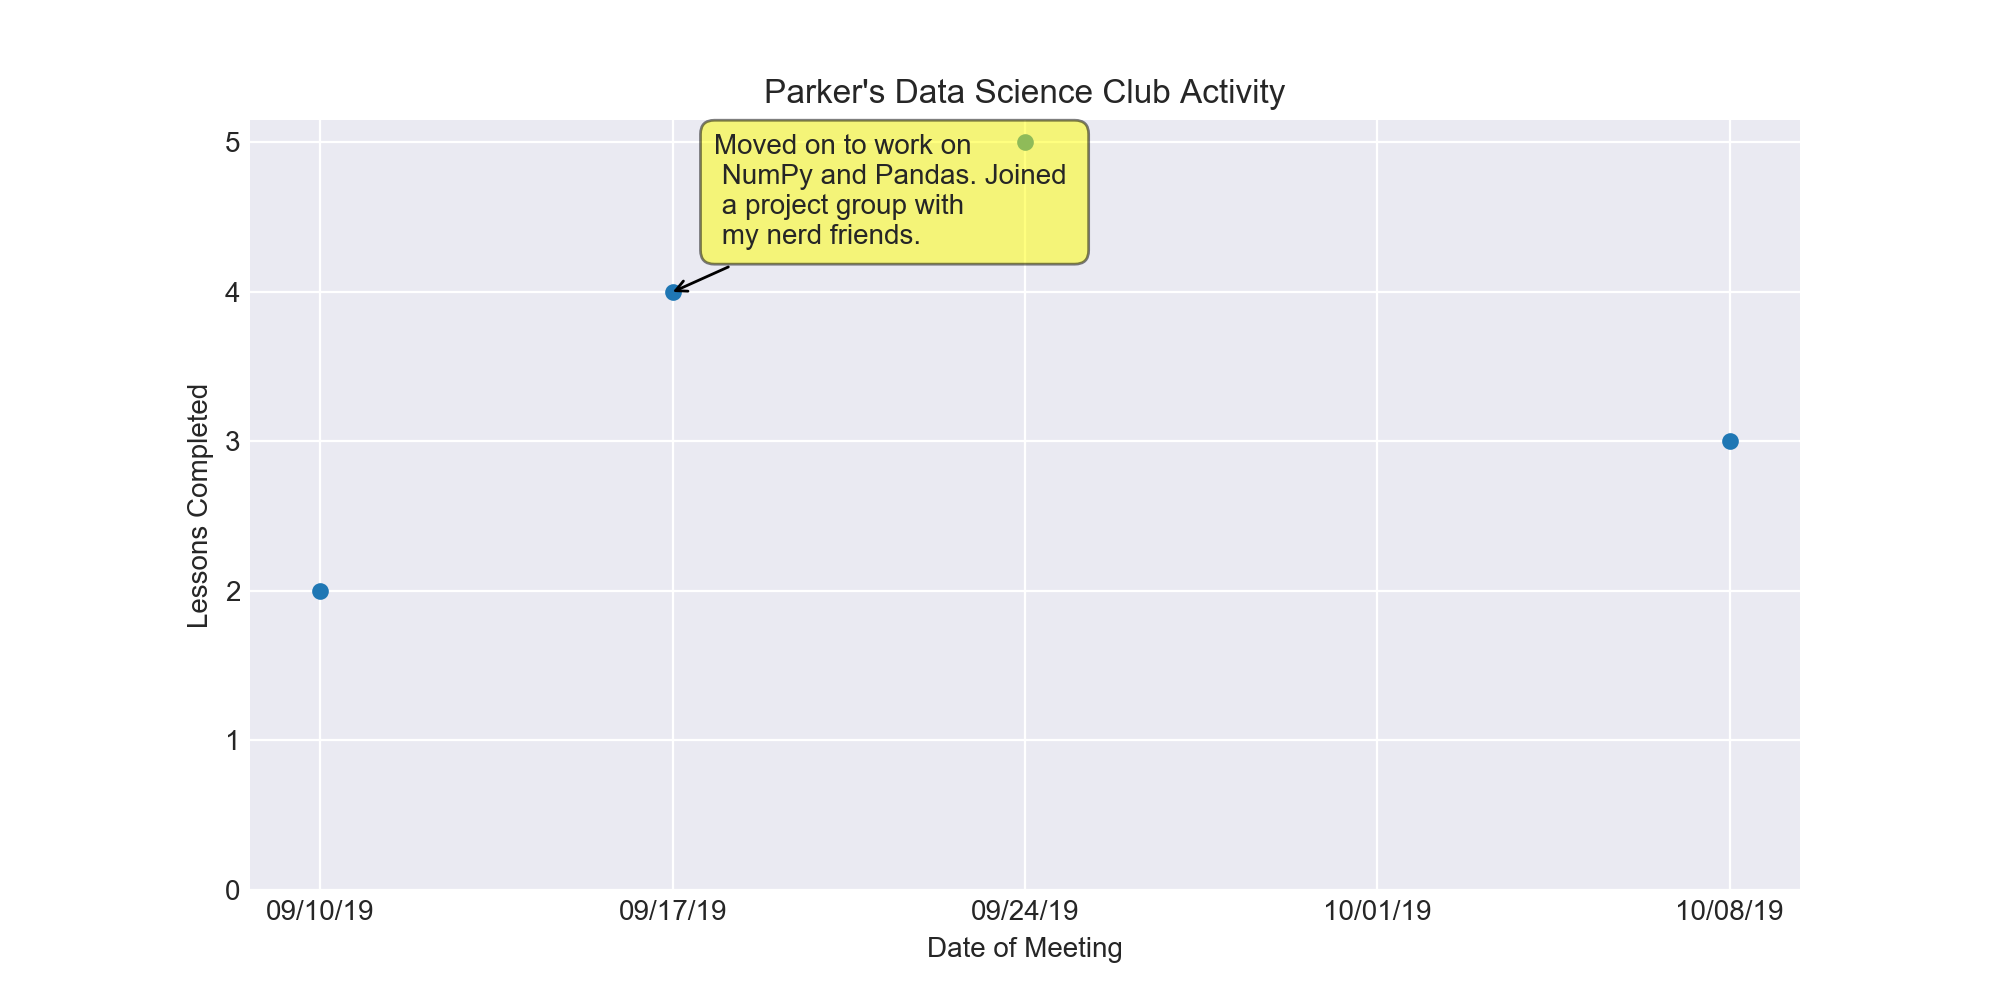

In [151]:
visualize_progress()